#### HW6_456, Conv NN
#### Name: Justin Chong
#### Due Date: 12/11/2023

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import tensorflow as tf
from pandas import DataFrame
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [9]:
height,width = 100,100

In [10]:
#prof fahim test set
test_dir = pathlib.Path('C:/Users/tacot/Downloads/hw6_456/test_data/test_data').with_suffix('')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(height, width),
    batch_size=32,
    shuffle=False
)

Found 20 files belonging to 2 classes.


In [12]:
#the train folder has already been moved to 2 seperate directories, cat and dog.
train_dir = pathlib.Path("C:/Users/tacot/Downloads/hw6_456/train").with_suffix('')
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.05,
    subset='training',
    seed=123,
    image_size=(height,width),
    batch_size=32)
class_names = train_ds.class_names
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.05,
    subset='validation',
    seed=123,
    image_size=(height,width),
    batch_size=32)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 23750 files for training.
Found 25000 files belonging to 2 classes.
Using 1250 files for validation.


In [13]:
for images, labels in val_ds.take(1):
    print(list(images))
    print(labels.shape)

[<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[159.92    ,  60.      ,  26.16    ],
        [157.76    ,  58.76    ,  26.76    ],
        [155.2     ,  59.      ,  27.8     ],
        ...,
        [133.      , 120.      , 111.      ],
        [133.      , 120.      , 111.      ],
        [133.      , 120.      , 111.      ]],

       [[159.92    ,  60.      ,  26.16    ],
        [157.76    ,  58.76    ,  26.76    ],
        [155.2     ,  59.      ,  27.8     ],
        ...,
        [133.      , 120.      , 111.      ],
        [133.      , 120.      , 111.      ],
        [133.      , 120.      , 111.      ]],

       [[160.76    ,  60.84    ,  27.      ],
        [156.      ,  57.      ,  25.      ],
        [157.2     ,  61.      ,  29.8     ],
        ...,
        [132.4     , 119.399994, 110.399994],
        [131.      , 118.      , 109.      ],
        [133.      , 120.      , 111.      ]],

       ...,

       [[210.92003 , 164.67204 , 144.74405 ],
        [179

In [14]:
cnn = Sequential([
    layers.Rescaling(1./255,input_shape=(height,width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(12,3,padding='same',activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    #layers.Dense(250,activation='relu'),
    layers.Dense(125,activation='relu'),
    #layers.Dense(75,activation='relu'),
    #layers.Dense(25,activation='relu'),
    layers.Dense(len(class_names))
    ])
cnn.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 average_pooling2d_5 (Avera  (None, 50, 50, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 average_pooling2d_6 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)       

In [16]:
epoch=23
history=cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch)
print(cnn.evaluate(test_ds))

Epoch 1/23


743/743 [==============================] - 76s 99ms/step - loss: 0.6787 - accuracy: 0.5600 - val_loss: 0.6617 - val_accuracy: 0.6064
Epoch 2/23
743/743 [==============================] - 34s 46ms/step - loss: 0.6163 - accuracy: 0.6610 - val_loss: 0.5634 - val_accuracy: 0.7048
Epoch 3/23
743/743 [==============================] - 33s 44ms/step - loss: 0.5284 - accuracy: 0.7330 - val_loss: 0.4986 - val_accuracy: 0.7536
Epoch 4/23
743/743 [==============================] - 34s 45ms/step - loss: 0.4668 - accuracy: 0.7749 - val_loss: 0.4554 - val_accuracy: 0.7896
Epoch 5/23
743/743 [==============================] - 34s 46ms/step - loss: 0.4132 - accuracy: 0.8066 - val_loss: 0.4307 - val_accuracy: 0.7936
Epoch 6/23
743/743 [==============================] - 34s 45ms/step - loss: 0.3759 - accuracy: 0.8308 - val_loss: 0.4043 - val_accuracy: 0.8056
Epoch 7/23
743/743 [==============================] - 35s 48ms/step - loss: 0.3437 - accuracy: 0.8472 - val_loss: 0.3803 - val_accurac

#### Answer Questions:

#### 1. Parameters: batch_size-32, epoch-23, optimizer-adam, loss-categorical cross entropy
####    Generally speaking, the higher the epoch, the higher the training accuracy becomes (overfitting)

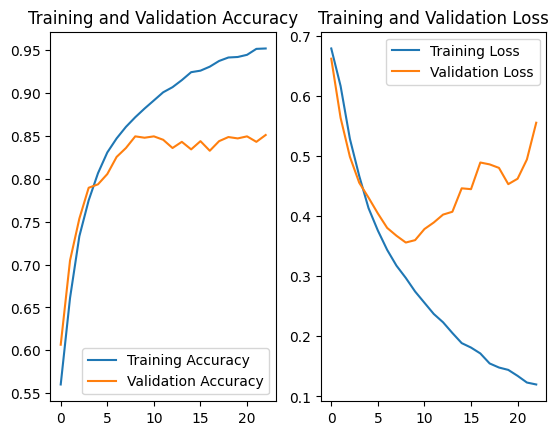

In [17]:
#   The best training accuracy is 95% with a validation accuracy of 85% on epoch 
#   Corresponding accuracy and loss plot is below
epoch_range=range(epoch)
plt.subplot(1,2,1)
plt.plot(epoch_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epoch_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_range,history.history['loss'],label='Training Loss')
plt.plot(epoch_range,history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [18]:
#writes to an excel sheet block
cnn.predict(test_ds).argmax(axis=1)
labels_write
prediction_write
plt.figure(figsize=(10,10))
names = test_ds.file_paths
names = list(map(lambda x: x[66-9:],names))
for images, label in test_ds:
    prediction_write = cnn.predict(test_ds).argmax(axis=1)
    labels_write = label
    score_write = cnn.predict(test_ds).max(axis=1)
labels_write = list(map(lambda x: class_names[x], labels_write))
prediction_write = list(map(lambda x: class_names[x], prediction_write))
final_write = {'Name': names,
               'Class': labels_write,
               'Predict': prediction_write,
               'Score': score_write}
df = DataFrame(final_write)
df.to_excel('output.xlsx')
    
    

1/1 [==============================] - 0s 176ms/step


NameError: name 'labels_write' is not defined

In [ ]:
#4. Report the accuracy of the testing
print("Accuracy of the Testing:")
print(cnn.evaluate(test_ds,verbose=0))